In [1]:
!pip install WordCloud

In [2]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
import requests

from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://news.google.com/search?for=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'
busca = requests.get(url)

In [4]:
dados_busca = BeautifulSoup(busca.text, 'html.parser')

In [5]:
dados_busca.title

<title>Google Notícias - Pesquisar</title>

In [6]:
dados_busca.title.string

'Google Notícias - Pesquisar'

In [7]:
dados_busca.title.name

'title'

In [8]:
dados_busca.find(class_='ipQwMb ekueJc RD0gLb').string

'‘Efeito Americanas’ congela emissões de crédito privado | Finanças | Valor'

In [9]:
len(dados_busca.find_all('div'))

1376

In [10]:
def bucar_empresas(item_busca):
    url = f'https://news.google.com/search?for={item_busca}&hl=pt-BR&gl=BR&ceid=BR%3Apt-419'
    resposta = requests.get(url)
    obj_soap = BeautifulSoup(resposta.text, 'html.parser')
    print(url)
    return obj_soap

In [11]:
dados = bucar_empresas('americanas')
len(dados)

https://news.google.com/search?for=americanas&hl=pt-BR&gl=BR&ceid=BR%3Apt-419


4

In [12]:
elementos = dados.find_all('h3')

In [13]:
noticias = [texto.get_text() for texto in elementos]

In [14]:
print('Notícias:')
noticias

Notícias:


['‘Efeito Americanas’ congela emissões de crédito privado | Finanças | Valor',
 'O ponto em comum entre crises de Americanas, Marisa e Light',
 'A negociação entre os debenturistas e a Americanas',
 "Crise da Americanas é ponta do 'iceberg'",
 'Vender ou capitalizar? Tombo da Americanas coloca em xeque futuro da Ame Digital',
 'Mercado Livre começa a ocupar o vácuo da Americanas, diz BofA',
 'Mercado Livre reverte prejuízo e ganha share, ainda sem efeito Americanas',
 'Como a Americanas (AMER3) impacta o futuro do Mercado Livre (MELI34)',
 'Americanas deve mais de R$ 70 milhões a editoras de livros',
 'Dívida da Americanas com editoras é de R$ 85,6 milhões',
 'Americanas deve mais de R$ 70 milhões a editoras de livros',
 'Americanas quer manter suspensa busca e apreensão de e-mails de executivos',
 'Pivô do escândalo da Americanas, linha ‘risco sacado’ seca e afeta fornecedores',
 'Globo: Audiência desaba e emissora amarga prejuízo (e isso pode estar relacionado com a Americanas)',
 'A

In [15]:
len(noticias)

104

In [16]:
concat_palavras = ''

for loop in noticias:
    quebra = loop.split()

    for palavra in quebra:
        concat_palavras = concat_palavras + ' ' + palavra

In [17]:
concat_palavras

' ‘Efeito Americanas’ congela emissões de crédito privado | Finanças | Valor O ponto em comum entre crises de Americanas, Marisa e Light A negociação entre os debenturistas e a Americanas Crise da Americanas é ponta do \'iceberg\' Vender ou capitalizar? Tombo da Americanas coloca em xeque futuro da Ame Digital Mercado Livre começa a ocupar o vácuo da Americanas, diz BofA Mercado Livre reverte prejuízo e ganha share, ainda sem efeito Americanas Como a Americanas (AMER3) impacta o futuro do Mercado Livre (MELI34) Americanas deve mais de R$ 70 milhões a editoras de livros Dívida da Americanas com editoras é de R$ 85,6 milhões Americanas deve mais de R$ 70 milhões a editoras de livros Americanas quer manter suspensa busca e apreensão de e-mails de executivos Pivô do escândalo da Americanas, linha ‘risco sacado’ seca e afeta fornecedores Globo: Audiência desaba e emissora amarga prejuízo (e isso pode estar relacionado com a Americanas) Americanas deve mais de R$ 70 milhões a editoras de liv

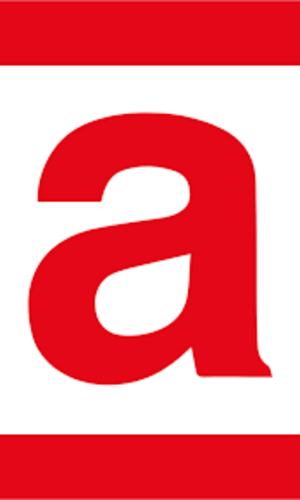

In [18]:
Image.open('AMER3.SA.png')

In [19]:
mascara = np.array(Image.open('AMER3.SA.png'))
mascara[0:4]

array([[[233,  74,  83],
        [233,  74,  83],
        [233,  74,  83],
        ...,
        [233,  74,  83],
        [233,  74,  83],
        [233,  74,  83]],

       [[230,  47,  59],
        [230,  47,  59],
        [230,  47,  59],
        ...,
        [230,  47,  59],
        [230,  47,  59],
        [230,  47,  59]],

       [[227,   6,  22],
        [227,   6,  22],
        [227,   6,  22],
        ...,
        [227,   6,  22],
        [227,   6,  22],
        [227,   6,  22]],

       [[226,   1,  18],
        [226,   1,  18],
        [226,   1,  18],
        ...,
        [226,   1,  18],
        [226,   1,  18],
        [226,   1,  18]]], dtype=uint8)

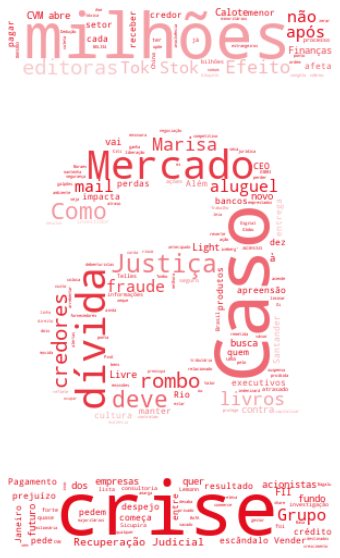

In [20]:
nuvem_palavras = WordCloud(
    width= 1200,
    height= 1000,
    background_color="white",
    mode="RGBA",
    mask = mascara,
    stopwords= ['Americanas', 'da', 'do', 'de', 'em', 'a', 'o', 'as', 'os',
                'e', 'que', 'com', 'para', 'R', 'na', 'no', 'nas', 'nos',
                'Veja', 'sobre', 'AMER3', 'é', 'se', 'das', 'diz', 'ao', 
                'aos', 'tem', 'têm', 'pode', 'por', 'mais', 'empresa', 'loja', 
                'Lojas']
).generate(concat_palavras)

figura, eixo = plt.subplots(figsize=(12,10))
eixo.imshow(nuvem_palavras.recolor(color_func=ImageColorGenerator(mascara)), interpolation='bilinear')
eixo.set_axis_off()
plt.savefig('nuvem-palavras-americanas.png', format="png")

In [21]:
noticias
 
matches = []
 
for match in noticias:
    if "Tok" in match:
        matches.append(match)
        
print(matches)

['Americanas, Tok&Stok e Marisa: “Calote” no aluguel preocupa FIIs', 'Finanças: Americanas, Tok&Stok e Marisa: “Calote” no aluguel ...', 'Com aluguel atrasado, Tok&Stok usa estratégia da Americanas (AMER3) para organizar finanças', 'Tok&Stok, Livraria Cultura e Americanas: o que está acontecendo ...']
